# 課題9: メディアンフィルタと先鋭化
メディアンフィルターを適用し、ノイズ除去を体験せよ。

移動平均法とメディアンフィルタ法を用いてノイズ除去を行う。原画像として、課題2の原画像に2%のごましおノイズを添付した画像（図1）を使用する。

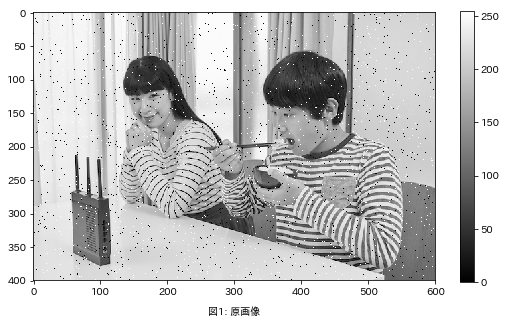

In [1]:
# 環境準備
%run -i prelude.ipynb

# 画像を読み込む
original = PIL.Image.open(IMAGE1_PATH)

# グレースケールに変換
original = np.array(original.convert(mode='L'))

# シード値 123 でランダム画像を作成
random_img = np.random.RandomState(123).random_sample(original.shape)
# 1% を黒に
original[random_img < 0.01] = 0
# 1% を白に
original[(random_img >= 0.01) & (random_img < 0.02)] = 255

# 表示
def imshow(img, vmax, title):
    fig, ax = plt.subplots(figsize=(9, 5))
    m = ax.imshow(img, cmap='gray', vmin=0, vmax=vmax)
    fig.colorbar(m)
    ax.text(0.5, -0.1, title,
            transform=ax.transAxes,
            horizontalalignment='center',
            verticalalignment='top')

imshow(original, 255, '図1: 原画像')

移動平均法では、着目画素の周囲の画素の濃度の平均値を、着目画素の濃度値として使用する。ここでは、周囲 $3 \times 3$ の画素を用いて平均を求めてみる。移動平均法でノイズ除去を行った結果を図2に示す。

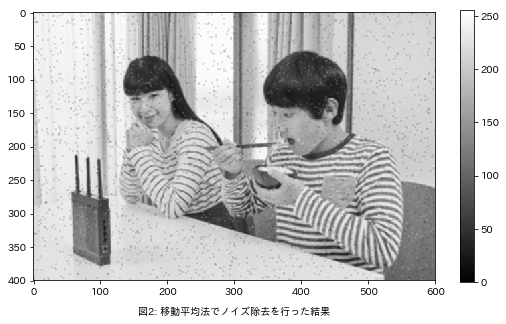

In [2]:
# 原画像と同じ大きさの画像を作成
avg_img = np.empty(original.shape, dtype=np.float)

for (i, j) in np.ndindex(original.shape):
    # 周囲 3x3 の画素を取得
    # 範囲外になる場合は、無視する
    pxs = original[
        max(i - 1, 0) : min(i + 2, original.shape[0]),
        max(j - 1, 0) : min(j + 2, original.shape[1])
    ]
    
    # 平均を画素の値にする
    avg_img[i, j] = pxs.mean()

# 表示
imshow(avg_img, 255, '図2: 移動平均法でノイズ除去を行った結果')

メディアンフィルタ法では、着目画素の周囲の画素の濃度の中央値を、着目画素の濃度値として使用する。移動平均法と同様に、周囲 $3 \times 3$ の画素を用いて中央値を求めてみる。メディアンフィルタ法でノイズ除去を行った結果を図3に示す。

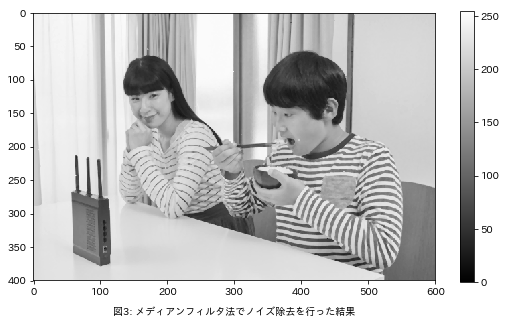

In [3]:
# 原画像と同じ大きさの画像を作成
med_img = np.empty(original.shape, dtype=np.float)

for (i, j) in np.ndindex(original.shape):
    # 周囲 3x3 の画素を取得
    # 範囲外になる場合は、無視する
    pxs = original[
        max(i - 1, 0) : min(i + 2, original.shape[0]),
        max(j - 1, 0) : min(j + 2, original.shape[1])
    ]
    
    # 中央値を画素の値にする
    med_img[i, j] = np.median(pxs)

# 表示
imshow(med_img, 255, '図3: メディアンフィルタ法でノイズ除去を行った結果')

移動平均法（図2）では、ノイズが平滑化されて、画像全体がほこりをかぶったようにノイズの影響を受けた画像になってしまった。一方、メディアンフィルタ法（図3）では、いくつかごましおのようなものが見えるが、全体的にはほとんどノイズを除去できている。